In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("customer.csv")
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
#data preprocessing
X=df[['Age','Annual Income','Spending Score']]
X.head()

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76
3,23,55460,57
4,24,153752,76


In [4]:
X.shape

(15079, 3)

In [5]:
# Scale and normalize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X.head()

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76
3,23,55460,57
4,24,153752,76


In [6]:
X.shape

(15079, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

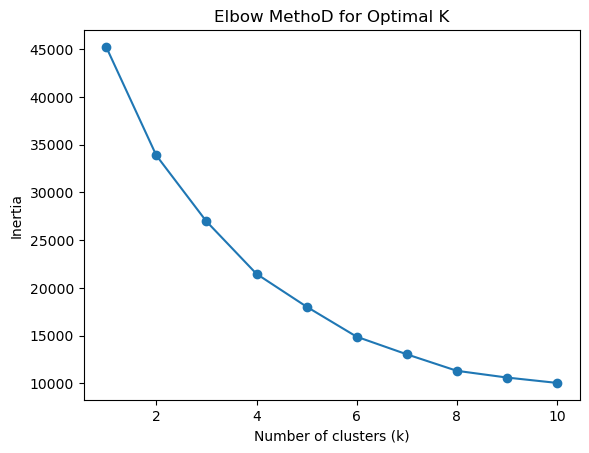

In [7]:
# choose optimal K using the elbow methid
inertia=[]
K=range(1,11)
for k in K:
    model=KMeans(n_clusters=k, random_state=64, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
plt.figure()
plt.plot(K,inertia,marker='o')
plt.title("Elbow MethoD for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show

In [8]:
# visualize clusters using 2d/3d plots
# applying K-Means clusering
k=7
kmeans=KMeans(n_clusters=k,random_state=64, n_init=10)
clusters=kmeans.fit_predict(X_scaled)
df['cluster']=clusters
print(clusters) #check cluster label
df.head() #verify if cluster column is added

[1 5 0 ... 2 2 2]


,Customer ID,Age,Gender,Annual Income,Spending Score,cluster
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,1
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,5
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,0
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,2
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,1


In [9]:
print(df['cluster'].value_counts()) #to count customers per cluster

2    2350
1    2290
0    2265
5    2242
4    2127
3    2023
6    1782
Name: cluster, dtype: int64


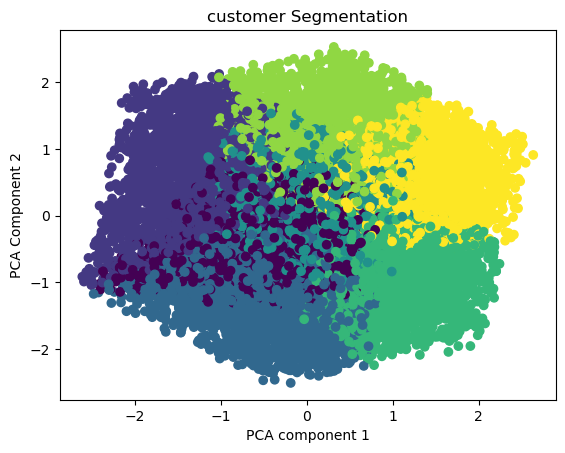

In [10]:
# 2D vizualiztion usinf PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1], c=clusters,cmap='viridis')
plt.title("customer Segmentation")
plt.xlabel("PCA component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [11]:
# summary of cluster
print(df.groupby('cluster')[['Age','Annual Income','Spending Score']].mean())

               Age  Annual Income  Spending Score
cluster                                          
0        63.685210   58531.626049       78.189404
1        33.094323  131855.595197       78.917031
2        34.349787   60326.686383       35.968085
3        35.964904  155912.431537       26.240732
4        72.172073   66673.061589       26.069111
5        71.468778  152585.619090       74.114184
6        72.895623  156678.074074       25.717733


In [12]:
print(len(clusters), len(df))

15079 15079
